In [1]:
!pwd
import sys
%reload_ext autoreload
%autoreload 2
%matplotlib inline
sys.executable

C:\Users\yokoi.shingo\my_poetry\tf1\999_tmp\TGAN_test


'c:\\users\\yokoi.shingo\\appdata\\local\\pypoetry\\cache\\virtualenvs\\tf1-wivilbib-py3.7\\scripts\\python.exe'

# テーブルデータ向けのGAN（TGAN）で、titanicのデータを増やす
- https://upura.hatenablog.com/entry/2019/08/20/120000#f-0082fa56
- https://github.com/upura/upura.hatenablog/blob/master/books_sites/tgan/tgan-titanic.ipynb

<br>

## TGANとは
テーブルデータに対応した GAN (Generative Adversarial Network, 敵対的生成ネットワーク) *2 です。数値などの連続変数だけではなく、カテゴリ変数にも対応しています
- github: https://github.com/sdv-dev/TGAN
- 論文: https://arxiv.org/abs/1811.11264

<br>

### Titanic のデータを対象にTGANを試す

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = sns.load_dataset("titanic")

### 欠損値の削除
TGANは、欠損値に対応していません

In [2]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

欠損値が大半を占める 'deck' は、この段階で削除

その他、ID列など学習に不要な列は削除しておくこと

In [3]:
df.drop(['deck'], axis=1, inplace=True)

'age' は平均値を四捨五入して整数にした値にする

In [5]:
df['age'].fillna(round(df['age'].mean(), 0), inplace=True)

### カラム名の保持
現在 PyPI でインストールできる TGAN (ver 0.1.0) には、実行後に DataFrame のカラム名がインデックス番号に置換されてしまう不具合がある　　

そのため、実行後のために事前にカラム名を変数に入れて保持しておく必要がある

In [6]:
df_columns = df.columns

### 連続変数の指定
TGAN の実行時には、連続変数のカラムのインデックス番号一覧をリスト型で渡します。今回は、次のように float 型のカラムを抽出しました。

In [7]:
continuous_columns = [df.columns.get_loc(c) for c in df.select_dtypes(include=['float']).columns]

### TGAN の実行

In [8]:
from tgan.model import TGANModel

tgan = TGANModel(continuous_columns, batch_size=50)
tgan.fit(df)







[1016 09:41:49 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[1016 09:41:49 @registry.py:126] gen/LSTM/00/FC input: [50, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[1016 09:41:49 @registry.py:134] gen/LSTM/00/FC output: [50, 100]
[1016 09:41:49 @registry.py:126] gen/LSTM/00/FC2 input: [50, 100]
[1016 09:41:49 @registry.py:134] gen/LSTM/00/FC2 output: [50, 2]
[1016 09:41:49 @registry.py:126] gen/LSTM/00/FC3 input: [50, 2]
[1016 09:41:49 @registry.py:134] gen/LSTM/00/FC3 output: [50, 100]
[1016 09:41:49 @registry.py:126] gen/LSTM/01/FC input: [50, 100]
[1016 09:41:49 @registry.py:1

[1016 09:41:50 @registry.py:126] gen/LSTM/06/FC3 input: [50, 7]
[1016 09:41:50 @registry.py:134] gen/LSTM/06/FC3 output: [50, 100]
[1016 09:41:50 @registry.py:126] gen/LSTM/07/FC input: [50, 100]
[1016 09:41:50 @registry.py:134] gen/LSTM/07/FC output: [50, 100]
[1016 09:41:50 @registry.py:126] gen/LSTM/07/FC2 input: [50, 100]
[1016 09:41:50 @registry.py:134] gen/LSTM/07/FC2 output: [50, 1]
[1016 09:41:50 @registry.py:126] gen/LSTM/08/FC input: [50, 100]
[1016 09:41:50 @registry.py:134] gen/LSTM/08/FC output: [50, 100]
[1016 09:41:50 @registry.py:126] gen/LSTM/08/FC2 input: [50, 100]
[1016 09:41:50 @registry.py:134] gen/LSTM/08/FC2 output: [50, 5]
[1016 09:41:50 @registry.py:126] gen/LSTM/08/FC3 input: [50, 5]
[1016 09:41:50 @registry.py:134] gen/LSTM/08/FC3 output: [50, 100]
[1016 09:41:50 @registry.py:126] gen/LSTM/09/FC input: [50, 100]
[1016 09:41:50 @registry.py:134] gen/LSTM/09/FC output: [50, 100]
[1016 09:41:50 @registry.py:126] gen/LSTM/09/FC2 input: [50, 100]
[1016 09:41:50 @r

[1016 09:41:57 @base.py:209] Setup callbacks graph ...






[1016 09:41:57 @summary.py:46] [MovingAverageSummary] 6 operations in collection 'MOVING_SUMMARY_OPS' will be run with session hooks.
[1016 09:41:57 @summary.py:93] Summarizing collection 'summaries' of size 9.

[1016 09:41:57 @graph.py:98] Applying collection UPDATE_OPS of 4 ops.

[1016 09:41:58 @base.py:230] Creating the session ...


Instructions for updating:
Please use tensorflow.python.ops.op_selector.get_backward_walk_ops.



[1016 09:42:00 @base.py:236] Initializing the session ...
[1016 09:42:00 @base.py:243] Graph Finalized.


[1016 09:42:00 @concurrency.py:38] Starting EnqueueThread QueueInput/input_queue ...

[1016 09:42:00 @base.py:275] Start Epoch 1 ...


100%|###############################################################################9|9990/10000[05:36<00:00,31.14it/s]

100%|###############################################################################|10000/10000[05:38<00:00,29.52it/s]

[1016 09:47:39 @base.py:285] Epoch 1 (global_step 10000) finished, time:5 minutes 38 seconds.



[1016 09:47:40 @saver.py:79] Model saved to output\model\model-10000.
[1016 09:47:40 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.9
[1016 09:47:40 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.28
[1016 09:47:40 @monitor.py:467] GAN_loss/discrim/loss: 0.63928
[1016 09:47:40 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.305
[1016 09:47:40 @monitor.py:467] GAN_loss/gen/klloss: 0.2813
[1016 09:47:40 @monitor.py:467] GAN_loss/gen/loss: 1.0237
[1016 09:47:40 @monitor.py:467] QueueInput/queue_size: 50
[1016 09:47:40 @base.py:275] Start Epoch 2 ...


100%|###############################################################################|10000/10000[05:37<00:00,29.66it/s]

[1016 09:53:17 @base.py:285] Epoch 2 (global_step 20000) finished, time:5 minutes 37 seconds.
[1016 09:53:17 @saver.py:79] Model saved to output\model\model-20000.
[1016 09:53:17 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.82


[1016 09:53:17 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.22
[1016 09:53:17 @monitor.py:467] GAN_loss/discrim/loss: 0.67586
[1016 09:53:17 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.3066
[1016 09:53:17 @monitor.py:467] GAN_loss/gen/klloss: 0.33837
[1016 09:53:17 @monitor.py:467] GAN_loss/gen/loss: 0.96826
[1016 09:53:17 @monitor.py:467] QueueInput/queue_size: 50
[1016 09:53:17 @base.py:275] Start Epoch 3 ...


100%|###############################################################################|10000/10000[05:37<00:00,29.59it/s]

[1016 09:58:55 @base.py:285] Epoch 3 (global_step 30000) finished, time:5 minutes 37 seconds.
[1016 09:58:55 @saver.py:79] Model saved to output\model\model-30000.
[1016 09:58:55 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.88
[1016 09:58:55 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.4
[1016 09:58:55 @monitor.py:467] GAN_loss/discrim/loss: 0.6222
[1016 09:58:55 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.227
[1016 09:58:55 @monitor.py:467] GAN_loss/gen/klloss: 0.25727
[1016 09:58:55 @monitor.py:467] GAN_loss/gen/loss: 0.96969
[1016 09:58:55 @monitor.py:467] QueueInput/queue_size: 50
[1016 09:58:55 @base.py:275] Start Epoch 4 ...



100%|###############################################################################|10000/10000[05:46<00:00,28.85it/s]

[1016 10:04:41 @base.py:285] Epoch 4 (global_step 40000) finished, time:5 minutes 46 seconds.


[1016 10:04:42 @saver.py:79] Model saved to output\model\model-40000.
[1016 10:04:42 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.9
[1016 10:04:42 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.38
[1016 10:04:42 @monitor.py:467] GAN_loss/discrim/loss: 0.59399
[1016 10:04:42 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.2447
[1016 10:04:42 @monitor.py:467] GAN_loss/gen/klloss: 0.12599
[1016 10:04:42 @monitor.py:467] GAN_loss/gen/loss: 1.1188
[1016 10:04:42 @monitor.py:467] QueueInput/queue_size: 50
[1016 10:04:42 @base.py:275] Start Epoch 5 ...


100%|###############################################################################|10000/10000[05:30<00:00,30.28it/s]

[1016 10:10:12 @base.py:285] Epoch 5 (global_step 50000) finished, time:5 minutes 30 seconds.
[1016 10:10:12 @saver.py:79] Model saved to output\model\model-50000.


[1016 10:10:12 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.88
[1016 10:10:12 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0.26
[1016 10:10:12 @monitor.py:467] GAN_loss/discrim/loss: 0.64178
[1016 10:10:12 @monitor.py:467] GAN_loss/gen/final-g-loss: 1.227
[1016 10:10:12 @monitor.py:467] GAN_loss/gen/klloss: 0.19094
[1016 10:10:12 @monitor.py:467] GAN_loss/gen/loss: 1.0361
[1016 10:10:12 @monitor.py:467] QueueInput/queue_size: 50
[1016 10:10:12 @base.py:289] Training has finished!

[1016 10:10:13 @input_source.py:178] EnqueueThread QueueInput/input_queue Exited.

[1016 10:10:14 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[1016 10:10:14 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)


[1016 10:10:14 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was final

このときdocsには記載がありませんが、小さめのbatch_sizeを引数に指定しないと、tensorpack の assertion error で実行が止まってしまいます。

実行時間は、900弱のデータセットで15分程度でした。学習済のモデルは、次のように保存可能です。

In [31]:
model_path = './mymodel.pkl'
tgan.save(model_path, force=True)

[1016 11:24:10 @model.py:813] Model saved successfully.


In [27]:
tgan

In [32]:
# モデルロード

tgan = TGANModel.load(model_path)
tgan

[1016 11:25:03 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[1016 11:25:03 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[1016 11:25:03 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1016 11:25:04 @sessinit.py:114] Restoring checkpoint from output\model\model-50000 ...
INFO:tensorflow:Restoring parameters from output\model\model-50000


### サンプルの抽出
学習済のモデルから、次のようにデータを生成できます。今回は、元のデータセットと同数を指定しました。

In [11]:
num_samples = len(df)
samples = tgan.sample(num_samples)

 32%|###########################2                                                         |16/50[00:00<00:00,43.59it/s]


'age' が整数でないので丸める処理などは必要かもしれませんが、'sex' などカテゴリ変数も含めてデータが生成できていると分かります。　　

目的変数である 'survived' も、問題なく増幅されていました。

In [13]:
samples

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,1,1,male,32.496777,0,0,219.548081,C,First,man,True,Cherbourg,yes,False
1,0,1,male,14.703795,1,0,60.550237,S,First,man,True,Southampton,no,False
2,1,1,female,13.731302,1,2,127.947212,S,First,woman,False,Southampton,yes,False
3,0,1,male,33.866376,0,0,50.405272,S,First,man,True,Southampton,no,True
4,1,3,female,29.998914,0,0,13.581338,Q,Third,woman,False,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1,1,male,29.999120,0,0,21.910282,C,First,man,True,Cherbourg,yes,True
846,0,3,female,2.682176,3,2,22.631794,S,Third,child,False,Southampton,no,False
847,0,1,male,18.248626,1,0,59.229103,C,First,man,True,Cherbourg,no,False
848,0,3,female,16.426865,0,2,15.464952,S,Third,woman,False,Southampton,no,False


In [12]:
samples['survived'].value_counts()

0    552
1    298
Name: survived, dtype: int64

### おわりに
本記事では、TGAN を用いて titanic のデータを拡張してみました。  

<br>

Kaggle などの文脈で言うと、学習用データの水増しに利用できる可能性があります。  

<br>

ただし、ynktk さんとも議論した通り、GAN でまともなデータを作るにはそもそも十分量のデータセットが必要というジレンマがありそうです。
- 論文読んでないから知らないけど、GANでそこそこまともなデータを生成できるくらい学習できるデータあるならデータ拡張あんまり効かないのでは？と思う。知らんけど

<br>

TGAN で増やしたデータで性能が向上するかはデータセットと課題設定次第ですが、機会があれば試してみても面白いなと思いました。

## lightGBMで精度比較
### 論文の結果と同様にTGANの生成データ追加したほうが精度悪くなった（validation error上がるため逆効果）

In [45]:
import os
import gc
import joblib
import warnings

import numpy as np
import pandas as pd
from lightgbm import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

warnings.filterwarnings('ignore')


class Model:
    def __init__(
        self,
        output_dir=None,
        dict_enc_flag={"count": True, "target": True, "catboost": True},
    ):
        self.output_dir = output_dir
        self.dict_enc_flag = dict_enc_flag

    def _encoding(self, tr_df, te_df, target_col):
        """ターゲットエンコディングとか一括実行"""
        if self.dict_enc_flag["count"]:
            # カウントエンコディング
            tr_df, te_df = Model().count_encoder(tr_df, te_df, cat_features=None)
        if self.dict_enc_flag["target"]:
            # ターゲットエンコディング
            tr_df, te_df = Model().target_encoder(
                tr_df, te_df, target_col=target_col, cat_features=None
            )
        if self.dict_enc_flag["catboost"]:
            # CatBoostエンコディング
            tr_df, te_df = Model().catboost_encoder(
                tr_df, te_df, target_col=target_col, cat_features=None
            )
        # ラベルエンコディング
        cate_cols = tr_df.select_dtypes(
            include=["object", "category", "bool"]
        ).columns.to_list()
        for col in cate_cols:
            tr_df[col], uni = pd.factorize(tr_df[col])
            te_df[col], uni = pd.factorize(te_df[col])

        return tr_df, te_df

    # LightGBM GBDT with KFold or Stratified KFold
    # Parameters from Tilii kernel: https://www.kaggle.com/tilii7/olivier-lightgbm-parameters-by-bayesian-opt/code
    def kfold_cv_LGBMClassifier(
        self,
        lgb_params: dict,
        df: pd.DataFrame,
        num_folds: int,
        target_col: str,
        del_cols=None,
        select_cols=None,
        eval_metric="error",
        stratified=True,  # StratifiedKFoldにするか
        is_submission=False,  # Home_Credit_Default_Risk の submission.csv作成するか
        is_plot_perm_importance=False,  # permutation importanceも出すか. feature_importance はデフォルトでだす
    ):
        """
        LGBMClassifierでcross validation + feature_importance/permutation importance plot
        """
        # データフレームからID列など不要な列削除
        if del_cols is not None:
            df = df.drop(del_cols, axis=1)

        # 特徴量の列のみ保持
        feats = df.columns.to_list()
        feats.remove(target_col)

        # Divide in training/validation and test data
        train_df = df[df[target_col].notnull()].reset_index(drop=True)
        test_df = df[df[target_col].isnull()].reset_index(drop=True)
        print(
            f"INFO: Starting LightGBM. Train shape: {train_df.shape}, test shape: {test_df.shape}"
        )
        del df
        gc.collect()

        ###################################### cross validation ######################################
        # Cross validation model
        if stratified:
            folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=1001)
        else:
            folds = KFold(n_splits=num_folds, shuffle=True, random_state=1001)

        # Create arrays and dataframes to store results
        oof_preds = np.zeros(train_df.shape[0])
        sub_preds = np.zeros(test_df.shape[0])
        feature_importance_df = pd.DataFrame()
        permutation_importance_df = pd.DataFrame()
        result_scores = {}
        train_probas = {}
        test_probas = {}

        for n_fold, (train_idx, valid_idx) in enumerate(
            folds.split(train_df[feats], train_df[target_col])
        ):
            print(
                f"\n------------------------------------ n_fold={n_fold + 1} ------------------------------------"
            )
            ############################ create fold ############################
            t_fold_df = train_df.iloc[train_idx]
            v_fold_df = train_df.iloc[valid_idx]

            # ターゲットエンコディングとか一括実行
            t_fold_df, v_fold_df = self._encoding(t_fold_df, v_fold_df, target_col)
            print(
                f"INFO: run encoding Train shape: {t_fold_df.shape}, valid shape: {v_fold_df.shape}"
            )

            # 指定の列あればそれだけにする
            feats = t_fold_df.columns.to_list() if select_cols is None else select_cols
            if target_col in feats:
                feats.remove(target_col)
            print(f"INFO: len(feats): {len(feats)}\n")

            train_x, train_y = (
                t_fold_df[feats],
                t_fold_df[target_col],
            )
            valid_x, valid_y = (
                v_fold_df[feats],
                v_fold_df[target_col],
            )

            ############################ train fit ############################
            # LightGBM parameters found by Bayesian optimization
            clf = LGBMClassifier(**lgb_params)
            clf.fit(
                train_x,
                train_y,
                eval_set=[(train_x, train_y), (valid_x, valid_y)],
                eval_metric=eval_metric,
                verbose=200,
                early_stopping_rounds=200,
            )
            # モデル保存
            joblib.dump(clf, f"{self.output_dir}/lgb-{n_fold + 1}.model", compress=True)

            ############################ valid pred ############################
            oof_preds[valid_idx] = clf.predict_proba(
                valid_x, num_iteration=clf.best_iteration_
            )[:, 1]
            if eval_metric == "auc":
                fold_auc = roc_auc_score(valid_y, oof_preds[valid_idx])
                print("\nINFO: Fold %2d AUC : %.6f" % (n_fold + 1, fold_auc))
                result_scores[f"fold_auc_{str(n_fold + 1)}"] = fold_auc
            elif eval_metric == "error":
                # intにしないとaccuracy_score()エラーになる
                _pred = oof_preds[valid_idx]
                _pred[_pred >= 0.5] = 1
                _pred[_pred < 0.5] = 0
                fold_err = 1.0 - accuracy_score(valid_y, _pred)
                print("\nINFO: Fold %2d error : %.6f" % (n_fold + 1, fold_err))
                result_scores[f"fold_err_{str(n_fold + 1)}"] = fold_err

            ############################ test pred ############################
            if test_df.shape[0] > 0:
                # ターゲットエンコディングとか一括実行
                tr_df, te_df = self._encoding(train_df, test_df, target_col)

                # testの確信度
                test_probas[f"fold_{str(n_fold + 1)}"] = clf.predict_proba(
                    te_df[feats], num_iteration=clf.best_iteration_
                )[:, 1]
                sub_preds += test_probas[f"fold_{str(n_fold + 1)}"] / folds.n_splits

                # 一応trainの確信度も出しておく
                train_probas[f"fold_{str(n_fold + 1)}"] = clf.predict_proba(
                    tr_df[feats], num_iteration=clf.best_iteration_
                )[:, 1]

            ############################ importance 計算 ############################
            # feature_importance
            fold_importance_df = pd.DataFrame()
            fold_importance_df["feature"] = feats
            fold_importance_df["importance"] = clf.feature_importances_
            fold_importance_df["fold"] = n_fold + 1
            feature_importance_df = pd.concat(
                [feature_importance_df, fold_importance_df], axis=0
            )

            if is_plot_perm_importance:
                # permutation_importance
                # 時間かかるからifで制御する
                # scoringはsklearnのスコアリングパラメータ
                # accuracy や neg_mean_squared_log_error とか
                # https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
                fold_importance_df = pd.DataFrame()
                fold_permutation = permutation_importance(
                    clf, valid_x, valid_y, scoring="roc_auc"
                )
                fold_permutation_df = pd.DataFrame(
                    {
                        "feature": valid_x.columns,
                        "importance": np.abs(
                            fold_permutation["importances_mean"]
                        ),  # マイナスとるのもあるので絶対値にする
                        "fold": n_fold + 1,
                    },
                )
                permutation_importance_df = pd.concat(
                    [permutation_importance_df, fold_permutation_df], axis=0
                )

            del clf, train_x, train_y, valid_x, valid_y
            gc.collect()

        print(
            "\n------------------------------------ mean fold ------------------------------------"
        )
        mean_fold_score = None
        if eval_metric == "auc":
            mean_fold_score = roc_auc_score(train_df[target_col], oof_preds)
            print("INFO: Mean valid AUC score %.6f" % mean_fold_score)
            result_scores["mean_fold_auc"] = mean_fold_score
        elif eval_metric == "error":
            # intにしないとaccuracy_score()エラーになる
            _pred = oof_preds
            _pred[_pred >= 0.5] = 1
            _pred[_pred < 0.5] = 0
            mean_fold_score = 1.0 - accuracy_score(train_df[target_col], _pred)
            print("INFO: Mean valid error score %.6f" % mean_fold_score)
            result_scores["mean_fold_err"] = mean_fold_score

        # モデルの評価指標出力
        result_scores_df = pd.DataFrame(
            result_scores.values(), index=result_scores.keys()
        )
        result_scores_df.to_csv(f"{self.output_dir}/result_scores.tsv", sep="\t")

        # 確信度ファイル出力
        train_probas_df = pd.DataFrame(train_probas)
        train_probas_df.to_csv(f"{self.output_dir}/train_probas.tsv", index=False)
        if test_df.shape[0] > 0:
            test_probas_df = pd.DataFrame(test_probas)
            test_probas_df.to_csv(f"{self.output_dir}/test_probas.tsv", index=False)

            # Write submission file
            if is_submission:
                # bestの閾値探索
                tr_mean = train_probas_df.apply(lambda x: np.mean(x), axis=1).values
                # print(train_df[target_col].value_counts())
                best_threshold = Model().nelder_mead_th(train_df[target_col], tr_mean)
                print(f"INFO: submission best_threshold: {best_threshold}")
                # best_thresholdで2値化
                te_mean = test_probas_df.apply(lambda x: np.mean(x), axis=1).values
                te_mean[te_mean >= best_threshold] = 1
                te_mean[te_mean < best_threshold] = 0
                output_csv = f"{self.output_dir}/submission_kernel.csv"
                pd.DataFrame({"id": range(len(te_mean)), "y": te_mean}).to_csv(
                    output_csv, index=False
                )
                print(f"INFO: save csv {output_csv}")

        # Plot feature importance
        png_path = f"{self.output_dir}/lgbm_feature_importances.png"
        Model().display_importances(
            feature_importance_df, png_path=png_path, title="feature_importance",
        )
        # print(f"INFO: save png {png_path}")
        if is_plot_perm_importance:
            png_path = f"{self.output_dir}/lgbm_permutation_importances.png"
            Model().display_importances(
                permutation_importance_df,
                png_path=png_path,
                title="permutation_importance",
            )
            # print(f"INFO: save png {png_path}")

        return mean_fold_score, feature_importance_df, permutation_importance_df
    
    @staticmethod
    def count_encoder(train_df, valid_df, cat_features=None):
        """
        Count_Encoding: カテゴリ列をカウント値に変換する特徴量エンジニアリング（要はgroupby().size()の集計列追加のこと）
        ※カウント数が同じカテゴリは同じようなデータ傾向になる可能性がある
        https://www.kaggle.com/matleonard/categorical-encodings
        """
        # conda install -c conda-forge category_encoders
        import category_encoders as ce

        if cat_features is None:
            cat_features = train_df.select_dtypes(
                include=["object", "category", "bool"]
            ).columns.to_list()

        count_enc = ce.CountEncoder(cols=cat_features)

        # trainだけでfitすること(validationやtest含めるとリークする)
        count_enc.fit(train_df[cat_features])
        train_encoded = train_df.join(
            count_enc.transform(train_df[cat_features]).add_suffix("_count")
        )
        valid_encoded = valid_df.join(
            count_enc.transform(valid_df[cat_features]).add_suffix("_count")
        )

        return train_encoded, valid_encoded

    @staticmethod
    def target_encoder(train_df, valid_df, target_col: str, cat_features=None):
        """
        Target_Encoding: カテゴリ列を目的変数の平均値に変換する特徴量エンジニアリング
        https://www.kaggle.com/matleonard/categorical-encodings
        """
        # conda install -c conda-forge category_encoders
        import category_encoders as ce

        if cat_features is None:
            cat_features = train_df.select_dtypes(
                include=["object", "category", "bool"]
            ).columns.to_list()

        target_enc = ce.TargetEncoder(cols=cat_features)

        # trainだけでfitすること(validationやtest含めるとリークする)
        target_enc.fit(train_df[cat_features], train_df[target_col])

        train_encoded = train_df.join(
            target_enc.transform(train_df[cat_features]).add_suffix("_target")
        )
        valid_encoded = valid_df.join(
            target_enc.transform(valid_df[cat_features]).add_suffix("_target")
        )
        return train_encoded, valid_encoded

    @staticmethod
    def catboost_encoder(train_df, valid_df, target_col: str, cat_features=None):
        """
        CatBoost_Encoding: カテゴリ列を目的変数の1行前の行からのみに変換する特徴量エンジニアリング
        CatBoost使ったターゲットエンコーディング
        https://www.kaggle.com/matleonard/categorical-encodings
        """
        # conda install -c conda-forge category_encoders
        import category_encoders as ce

        if cat_features is None:
            cat_features = train_df.select_dtypes(
                include=["object", "category", "bool"]
            ).columns.to_list()

        cb_enc = ce.CatBoostEncoder(cols=cat_features, random_state=7)

        # trainだけでfitすること(validationやtest含めるとリークする)
        cb_enc.fit(train_df[cat_features], train_df[target_col])

        train_encoded = train_df.join(
            cb_enc.transform(train_df[cat_features]).add_suffix("_cb")
        )
        valid_encoded = valid_df.join(
            cb_enc.transform(valid_df[cat_features]).add_suffix("_cb")
        )
        return train_encoded, valid_encoded

    # Display/plot feature/permutation importance
    @staticmethod
    def display_importances(
        importance_df_,
        png_path,
        title,
    ):
        cols = (
            importance_df_[["feature", "importance"]]
            .groupby("feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:40]
            .index
        )
        best_features = importance_df_.loc[importance_df_.feature.isin(cols)]
        plt.figure(figsize=(8, 10))
        sns.barplot(
            x="importance",
            y="feature",
            data=best_features.sort_values(by="importance", ascending=False),
        )
        plt.title(f"LightGBM {title} (avg over folds)")
        plt.tight_layout()
        plt.savefig(png_path)

    @staticmethod
    def nelder_mead_th(true_y, pred_y):
        """ネルダーミードでf1スコアから2値分類のbestな閾値見つける"""
        from scipy.optimize import minimize

        def opt(x):
            return 1.0 - f1_score(true_y, pred_y >= x)  # F1値
            #return 1.0 - accuracy_score(true_y, pred_y >= x)  # 正解率

        result = minimize(opt, x0=np.array([0.5]), method="Nelder-Mead")
        best_threshold = result["x"].item()
        return best_threshold


def train_clf(df, OUTPUT_DIR="tmp", target_col="survived", del_cols=["alive"]):
    lgb_params = dict(
        silent=-1,
        random_state=71,
        importance_type="gain",
    )
    params = dict(
        lgb_params=lgb_params,
        df=df,
        num_folds=4,
        target_col=target_col,
        del_cols=del_cols,
        select_cols=None,
        eval_metric="error",  # "auc",
        stratified=False,  #True
        is_submission=True,  # False
        is_plot_perm_importance=False,
    )
    model = Model(
        output_dir=OUTPUT_DIR,
        #dict_enc_flag={"count": True, "target": True, "catboost": True},
        dict_enc_flag={"count": False, "target": False, "catboost": False},
    )
    mean_fold_score, feat_importance, perm_importance = model.kfold_cv_LGBMClassifier(**params)
    
    print(mean_fold_score)


(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1.0,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


INFO: Starting LightGBM. Train shape: (700, 14), test shape: (191, 14)

------------------------------------ n_fold=1 ------------------------------------
INFO: run encoding Train shape: (525, 14), valid shape: (175, 14)
INFO: len(feats): 13

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[99]	training's binary_error: 0.0380952	training's binary_logloss: 0.155303	valid_1's binary_error: 0.251429	valid_1's binary_logloss: 0.544343

INFO: Fold  1 error : 0.251429

------------------------------------ n_fold=2 ------------------------------------
INFO: run encoding Train shape: (525, 14), valid shape: (175, 14)
INFO: len(feats): 13

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	training's binary_error: 0.0457143	training's binary_logloss: 0.153618	valid_1's binary_error: 0.211429	valid_1's binary_logloss: 0.494398

INFO: Fold  2 error : 0.211429

-----------

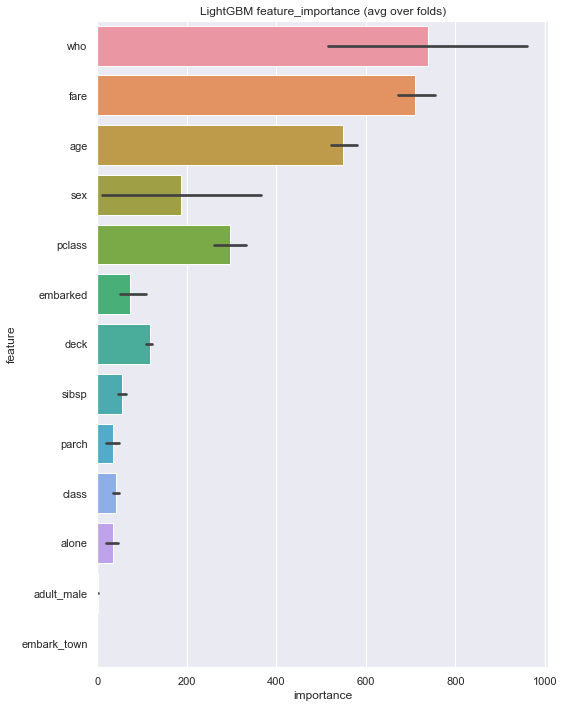

In [51]:
def run_orig_data():
    # サンプルデータ
    df = sns.load_dataset("titanic")
    df.iloc[700:, 0] = np.nan  # test set用意
    print(df.shape)
    display(df.head(2))

    OUTPUT_DIR = "tmp"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    train_clf(df, OUTPUT_DIR=OUTPUT_DIR, target_col="survived", del_cols=["alive"])
    
run_orig_data()

[1016 11:50:09 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[1016 11:50:09 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)
[1016 11:50:09 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1016 11:50:09 @sessinit.py:114] Restoring checkpoint from output\model\model-50000 ...
INFO:tensorflow:Restoring parameters from output\model\model-50000


 32%|###########################2                                                         |16/50[00:00<00:00,44.43it/s]

(1741, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1.0,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


INFO: Starting LightGBM. Train shape: (1550, 14), test shape: (191, 14)

------------------------------------ n_fold=1 ------------------------------------
INFO: run encoding Train shape: (1162, 14), valid shape: (388, 14)
INFO: len(feats): 13

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[96]	training's binary_error: 0.0481928	training's binary_logloss: 0.170251	valid_1's binary_error: 0.729381	valid_1's binary_logloss: 1.82502

INFO: Fold  1 error : 0.729381

------------------------------------ n_fold=2 ------------------------------------
INFO: run encoding Train shape: (1162, 14), valid shape: (388, 14)
INFO: len(feats): 13

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[100]	training's binary_error: 0.0542169	training's binary_logloss: 0.186897	valid_1's binary_error: 0.164948	valid_1's binary_logloss: 0.444021

INFO: Fold  2 error : 0.164948

---------

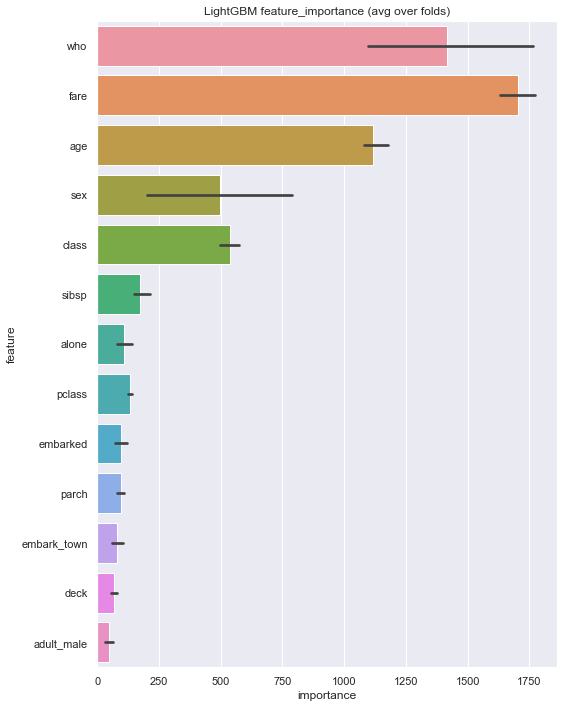

In [52]:
def run_orig_TGAN_data():
    # サンプルデータ
    df = sns.load_dataset("titanic")
    df.iloc[700:, 0] = np.nan  # test set用意
    
    # ------------------------------------------------
    # 学習したTGANロード
    tgan = TGANModel.load(model_path)
    
    # データ生成
    num_samples = len(df)
    samples = tgan.sample(num_samples)
    
    samples["age"] = np.round(samples["age"])
    samples["deck"] = np.nan
    samples["survived"] = samples["survived"].astype("float")
    
    #print(samples.shape)
    #display(samples)
    #print(samples['survived'].value_counts())
    
    df = df.append(samples)
    # ------------------------------------------------
    
    print(df.shape)
    display(df.head(2))
    
    OUTPUT_DIR = "tmp"
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    train_clf(df, OUTPUT_DIR=OUTPUT_DIR, target_col="survived", del_cols=["alive"])
    

run_orig_TGAN_data()